# Transfer of Airport Movement Data

Notebook addressing the creation of an Excel file report for the "Transfer of Airport Movement Data" on Lommis Airfield.

Template used in accordance with the one provided by the Federal Office of Civil Aviation (BAZL): https://www.bazl.admin.ch/bazl/de/home/themen/geoinformation_statistik/statistik/statistische_datenlieferungen.html

In [1]:
## IMPORT LIBRARIES ##
import os
import lommis_func
import warnings
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Alignment
from datetime import datetime, timedelta
from traffic.core import Traffic, Flight
from traffic.data import airports, opensky, eurofirs
warnings.simplefilter("ignore")

In [2]:
# Year and Month of the fetching data
year = 2025
month = 1

In [98]:
## FETCH DATA FROM LOMMIS AIRFIELD ##

# Define the start date
start_date = datetime.strptime(f"{year}-{month}-01 00:00", "%Y-%m-%d %H:%M")
 
# Number of iterations
num_iterations = 30

# Define the parquet directory path
folder_name = f"{month:02d}{year}"
parquet_dir_path = os.path.join("Flights/", folder_name)

os.makedirs(parquet_dir_path, exist_ok=True)
# Delete all contents of the parquet directory if any exists
# if os.path.exists(parquet_dir_path):
#     shutil.rmtree(parquet_dir_path)
#     os.makedirs(parquet_dir_path)
#     print(f"Deleted all contents in the directory: {parquet_dir_path}")

for i in range(num_iterations):
    # Generate stop date
    stop_date = start_date + timedelta(days=1)
 
    # Format both dates as strings in the desired format
    start_str = start_date.strftime("%Y-%m-%d %H:%M")
    stop_str = stop_date.strftime("%Y-%m-%d %H:%M")
    print(f"Fetching data for Start: {start_str}, Stop: {stop_str}\n")
    
    # fetch data
    trajs = opensky.history(
        start = start_str,
        stop = stop_str,
        #bounds = airports['LSZT'].shape.buffer(0.1).bounds,
        airport = "LSZT",
        selected_columns=(
        'time', 'icao24', 'callsign', 'lat', 'lon', 'heading', 'baroaltitude', 'velocity', 'vertrate'
        ),
    )
    if trajs is not None:
        file_date = start_date.strftime("%Y-%m-%d")
        #trajs.to_parquet(os.path.join(parquet_dir_path, f"{file_date}.parquet"))

        # Filter for aligned over runway 24
        aligned_flights = []
        for flight in trajs:
            min_alt = flight.data.altitude.min()

            if pd.notna(min_alt) and min_alt < airports["LSZT"].altitude + 300:
                seg = lommis_func.aligned_over_runway(flight, airports["LSZT"], '24', scale=1.5, debug=False)
                

                if seg is not None and len(seg) >= 1:
                    #landed    = flight.landing_at(airports["LSZT"])
                    #took_off  = flight.takeoff_from(airports["LSZT"])

                    #if landed or took_off:
                    aligned_flights.append(flight)

        # Save aligned only if we found any
        if aligned_flights:
            t_lszt = Traffic.from_flights(aligned_flights)
            t_lszt.to_parquet(os.path.join(parquet_dir_path, f"{file_date}.parquet"))
            print(f"Saving flight {file_date} with {len(t_lszt)} trajectories...\n")

    # Update date
    start_date += timedelta(days=1)

Fetching data for Start: 2025-05-01 00:00, Stop: 2025-05-02 00:00



RUNNING: : 68.8% [00:46, 1.47%/s]
DOWNLOAD: 58.7klines [00:01, 37.4klines/s]


Saving flight 2025-05-01 with 7 trajectories...

Fetching data for Start: 2025-05-02 00:00, Stop: 2025-05-03 00:00



RUNNING: : 63.3% [00:39, 1.62%/s]
DOWNLOAD: 76.2klines [00:11, 6.90klines/s]


Saving flight 2025-05-02 with 8 trajectories...

Fetching data for Start: 2025-05-03 00:00, Stop: 2025-05-04 00:00



FINISHED: : 100% [00:51, 1.94%/s] 
DOWNLOAD: 37.4klines [00:00, 525klines/s]


Saving flight 2025-05-03 with 7 trajectories...

Fetching data for Start: 2025-05-04 00:00, Stop: 2025-05-05 00:00



0.00% [00:00, ?%/s]
DOWNLOAD: 0.00lines [00:00, ?lines/s]


Fetching data for Start: 2025-05-05 00:00, Stop: 2025-05-06 00:00



0.00% [00:00, ?%/s]
DOWNLOAD: 0.00lines [00:00, ?lines/s]


Fetching data for Start: 2025-05-06 00:00, Stop: 2025-05-07 00:00



FINISHED: : 100% [00:43, 2.30%/s] 
DOWNLOAD: 25.7klines [00:00, 42.2klines/s]


Saving flight 2025-05-06 with 5 trajectories...

Fetching data for Start: 2025-05-07 00:00, Stop: 2025-05-08 00:00



FINISHED: : 100% [00:50, 1.99%/s] 
DOWNLOAD: 18.5klines [00:00, 438klines/s]


Saving flight 2025-05-07 with 2 trajectories...

Fetching data for Start: 2025-05-08 00:00, Stop: 2025-05-09 00:00



FINISHED: : 100% [00:51, 1.94%/s] 
DOWNLOAD: 30.5klines [00:00, 53.0klines/s]


Saving flight 2025-05-08 with 5 trajectories...

Fetching data for Start: 2025-05-09 00:00, Stop: 2025-05-10 00:00



FINISHED: : 100% [00:52, 1.91%/s]  
DOWNLOAD: 33.7klines [00:00, 358klines/s]


Saving flight 2025-05-09 with 8 trajectories...

Fetching data for Start: 2025-05-10 00:00, Stop: 2025-05-11 00:00



RUNNING: : 54.8% [00:26, 2.04%/s]
DOWNLOAD: 90.9klines [00:16, 5.38klines/s]


Saving flight 2025-05-10 with 13 trajectories...

Fetching data for Start: 2025-05-11 00:00, Stop: 2025-05-12 00:00



RUNNING: : 55.0% [00:25, 2.19%/s]
DOWNLOAD: 69.6klines [00:13, 5.31klines/s]


Saving flight 2025-05-11 with 5 trajectories...

Fetching data for Start: 2025-05-12 00:00, Stop: 2025-05-13 00:00



RUNNING: : 55.6% [00:31, 1.78%/s]
DOWNLOAD: 81.7klines [00:11, 7.05klines/s]


Saving flight 2025-05-12 with 5 trajectories...

Fetching data for Start: 2025-05-13 00:00, Stop: 2025-05-14 00:00



FINISHED: : 100% [00:41, 2.40%/s] 
DOWNLOAD: 41.5klines [00:00, 134klines/s]


Saving flight 2025-05-13 with 5 trajectories...

Fetching data for Start: 2025-05-14 00:00, Stop: 2025-05-15 00:00



RUNNING: : 62.2% [00:36, 1.73%/s]
DOWNLOAD: 63.4klines [00:02, 23.0klines/s]


Saving flight 2025-05-14 with 7 trajectories...

Fetching data for Start: 2025-05-15 00:00, Stop: 2025-05-16 00:00



RUNNING: : 63.7% [00:38, 1.67%/s]
DOWNLOAD: 57.9klines [00:02, 20.6klines/s]


Saving flight 2025-05-15 with 4 trajectories...

Fetching data for Start: 2025-05-16 00:00, Stop: 2025-05-17 00:00



RUNNING: : 57.4% [00:30, 1.86%/s]
DOWNLOAD: 71.9klines [00:07, 9.57klines/s]


Saving flight 2025-05-16 with 7 trajectories...

Fetching data for Start: 2025-05-17 00:00, Stop: 2025-05-18 00:00



FINISHED: : 100% [00:43, 2.32%/s] 
DOWNLOAD: 46.2klines [00:00, 68.9klines/s]


Saving flight 2025-05-17 with 5 trajectories...

Fetching data for Start: 2025-05-18 00:00, Stop: 2025-05-19 00:00



RUNNING: : 62.1% [00:26, 2.39%/s]
DOWNLOAD: 56.1klines [00:02, 26.5klines/s]


Saving flight 2025-05-18 with 3 trajectories...

Fetching data for Start: 2025-05-19 00:00, Stop: 2025-05-20 00:00



RUNNING: : 68.4% [00:42, 1.62%/s]
DOWNLOAD: 55.7klines [00:01, 28.7klines/s]


Saving flight 2025-05-19 with 3 trajectories...

Fetching data for Start: 2025-05-20 00:00, Stop: 2025-05-21 00:00



RUNNING: : 69.4% [00:51, 1.36%/s]
DOWNLOAD: 50.2klines [00:00, 350klines/s]


Saving flight 2025-05-20 with 5 trajectories...

Fetching data for Start: 2025-05-21 00:00, Stop: 2025-05-22 00:00



FINISHED: : 100% [00:48, 2.07%/s] 
DOWNLOAD: 29.9klines [00:00, 427klines/s]


Saving flight 2025-05-21 with 1 trajectories...

Fetching data for Start: 2025-05-22 00:00, Stop: 2025-05-23 00:00



0.00% [00:00, ?%/s]
DOWNLOAD: 0.00lines [00:00, ?lines/s]


Fetching data for Start: 2025-05-23 00:00, Stop: 2025-05-24 00:00



FINISHED: : 100% [00:41, 2.39%/s] 
DOWNLOAD: 29.3klines [00:00, 452klines/s]


Saving flight 2025-05-23 with 12 trajectories...

Fetching data for Start: 2025-05-24 00:00, Stop: 2025-05-25 00:00



RUNNING: : 63.4% [00:37, 1.69%/s]
DOWNLOAD: 65.9klines [00:02, 22.4klines/s]


Saving flight 2025-05-24 with 19 trajectories...

Fetching data for Start: 2025-05-25 00:00, Stop: 2025-05-26 00:00



FINISHED: : 100% [00:24, 4.07%/s] 
DOWNLOAD: 8.78klines [00:00, 343klines/s]


Saving flight 2025-05-25 with 1 trajectories...

Fetching data for Start: 2025-05-26 00:00, Stop: 2025-05-27 00:00



FINISHED: : 100% [00:31, 3.14%/s] 
DOWNLOAD: 13.7klines [00:00, 479klines/s]


Saving flight 2025-05-26 with 6 trajectories...

Fetching data for Start: 2025-05-27 00:00, Stop: 2025-05-28 00:00



FINISHED: : 100% [00:36, 2.74%/s] 
DOWNLOAD: 16.3klines [00:00, 492klines/s]


Saving flight 2025-05-27 with 8 trajectories...

Fetching data for Start: 2025-05-28 00:00, Stop: 2025-05-29 00:00



FINISHED: : 100% [00:39, 2.53%/s] 
DOWNLOAD: 23.3klines [00:00, 400klines/s]


Saving flight 2025-05-28 with 7 trajectories...

Fetching data for Start: 2025-05-29 00:00, Stop: 2025-05-30 00:00



FINISHED: : 100% [00:39, 2.53%/s] 
DOWNLOAD: 31.9klines [00:00, 68.2klines/s]


Saving flight 2025-05-29 with 7 trajectories...

Fetching data for Start: 2025-05-30 00:00, Stop: 2025-05-31 00:00



RUNNING: : 55.5% [00:29, 1.90%/s]
DOWNLOAD: 67.1klines [00:11, 5.81klines/s]


Saving flight 2025-05-30 with 8 trajectories...



In [250]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get LSZT runway info
extreme1, extreme2, _ = lommis_func.retrieve_runway_information(airports["LSZT"], "24")

# Create a 1-row, 2-column subplot
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "geo"}, {"type": "geo"}]],
    subplot_titles=["All filtered flights", "Aligned over Runway 24"]
)

# LEFT PANEL: All filtered flights
for flight in traff_set:
    fig.add_trace(go.Scattergeo(
        lon=flight.data.longitude,
        lat=flight.data.latitude,
        mode="lines",
        line=dict(width=1, color="blue"),
        name=flight.callsign or "Filtered"
    ), row=1, col=1)

# RIGHT PANEL: Aligned flights only
for flight in t_lszt:
    fig.add_trace(go.Scattergeo(
        lon=flight.data.longitude,
        lat=flight.data.latitude,
        mode="lines",
        line=dict(width=2, color="red"),
        name=flight.callsign or "Aligned"
    ), row=1, col=2)

# Add runway overlay to both panels
for col in [1, 2]:
    fig.add_trace(go.Scattergeo(
        lon=[extreme1.longitude, extreme2.longitude],
        lat=[extreme1.latitude, extreme2.latitude],
        mode="lines",
        line=dict(width=4, color="black"),
        name="Runway 24",
        opacity=0.6
    ), row=1, col=col)

# Adjust zoom around Lommis
for i in [1, 2]:
    fig.update_geos(
        projection_type="equirectangular",
        showland=True,
        landcolor="rgb(240, 240, 240)",
        lonaxis_range=[extreme1.longitude - 0.03, extreme2.longitude + 0.03],
        lataxis_range=[extreme1.latitude - 0.03, extreme2.latitude + 0.03],
        row=1,
        col=i
    )

fig.update_layout(
    title="Comparison of All Filtered Flights vs Aligned Flights over Runway 24 (LSZT)",
    height=600,
    width=1400,
    showlegend=False
)

fig.show()


In [211]:
import plotly.graph_objects as go
from traffic.core import Flight
from shapely.geometry import LineString

# Prepare figure
fig = go.Figure()

# Runway data
extreme1, extreme2, _ = lommis_func.retrieve_runway_information(airports["LSZT"], "24")

# Extract aligned IDs for easy comparison
aligned_ids = {f.icao24 for f in t_lszt if hasattr(f, "icao24")}

# Add each flight with color based on alignment
for flight in traff_set:
    color = "red" if flight.icao24 in aligned_ids else "lightgray"
    width = 2 if color == "red" else 1

    fig.add_trace(go.Scattergeo(
        lon=flight.data.longitude,
        lat=flight.data.latitude,
        mode="lines",
        line=dict(width=width, color=color),
        name=flight.callsign or flight.icao24 or "unknown"
    ))

# Add runway line
fig.add_trace(go.Scattergeo(
    lon=[extreme1.longitude, extreme2.longitude],
    lat=[extreme1.latitude, extreme2.latitude],
    mode="lines",
    line=dict(width=4, color="black"),
    name="Runway 24"
))

# Zoom & layout
fig.update_geos(
    projection_type="equirectangular",
    showland=True,
    landcolor="rgb(240, 240, 240)",
    lonaxis_range=[extreme1.longitude - 0.03, extreme2.longitude + 0.03],
    lataxis_range=[extreme1.latitude - 0.03, extreme2.latitude + 0.03]
)

fig.update_layout(
    title="Flight Segments from traff_set_filtered (Red = Aligned in t_lszt)",
    height=700,
    showlegend=False
)

fig.show()


In [3]:
## RETRIEVE FETCHED DATA FROM FOLDER ##
flights = []
folder_name = f"{month:02d}{year}"
folder_path = os.path.join("Flights/", folder_name)
for filename in os.listdir(folder_path):

    if filename.endswith(".parquet"):
        file_path = os.path.join(folder_path, filename)
        flight = Flight.from_file(file_path)
        flights.append(flight)

traff_set = Traffic.from_flights(flights)

#convert flights Timestamp to 'datetime64'
traff_set.data['timestamp'] = traff_set.data['timestamp'].dt.tz_convert(None).astype('datetime64[ns]')
traff_set.data['timestamp'] = traff_set.data['timestamp'].dt.tz_localize('UTC')

In [4]:
## FILTERING FLIGHTS ##
from traffic.core.mixins import PointMixin
extreme1 = PointMixin()
extreme2 = PointMixin()
extreme1.latitude = 47.5257
extreme1.longitude = 9.0068
extreme2.latitude = 47.5233
extreme2.longitude = 8.9996

center = PointMixin()
center.latitude = (extreme1.latitude + extreme2.latitude) / 2
center.longitude = (extreme1.longitude + extreme2.longitude) / 2

filtered_flights = []
numeric_columns = ["latitude", "longitude", "track", "altitude", "groundspeed", "vertical_rate"]

for flight in traff_set:
    if flight.data[numeric_columns].isna().all().all():
        continue
    
    flight.data[numeric_columns] = flight.data[numeric_columns].ffill().bfill()

    if any((flight.data[numeric_columns] == 0).all()):
        continue
    
    if flight.data.dropna(subset=numeric_columns).empty:
        continue

    dist = np.array(flight.distance(center).data['distance'])
    if np.min(dist) > 1:  # if minimum distance is greater than 1 NM (not even close to airport)
        continue

    if not flight.data.index.is_unique:
        flight.data = flight.data.reset_index(drop=True)
    
    filtered_flights.append(flight)

traff_set_filtered = Traffic.from_flights(filtered_flights)
print(f"Total flights kept: {len(traff_set_filtered)}")

Total flights kept: 27


In [6]:
import os

# Filename and path
filename = f"{year}-{month:02d}-flights.parquet"
file_path = os.path.join("Statistics/", filename)

# Save
traff_set_filtered.to_parquet(file_path)
print(f"Filtered flight data saved to: {file_path}")

Filtered flight data saved to: Statistics/2025-01-flights.parquet


In [124]:
lommis_func.find_aerodrome_circuits(traff_set_filtered[8], airports["LSZT"], rwy = '06', plot=True)

(3,
 [(np.int64(1), np.int64(195)),
  (np.int64(195), np.int64(398)),
  (np.int64(398), np.int64(608))])

In [7]:
lommis_func.find_aerodrome_circuits(traff_set_filtered[22], airports["LSZT"], rwy = '24', plot=True)

KeyboardInterrupt: 

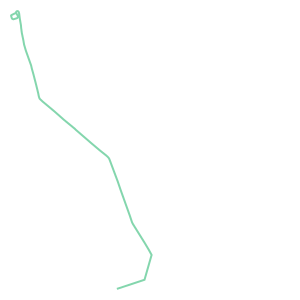

In [20]:
traff_set_filtered[25]

In [7]:
import folium

# Coordinates for LSZT runway ends
runway_coords = [
    [47.5257, 9.0068],  # Runway 06
    [47.5233, 8.9996],  # Runway 24
]

# Initialize map centered at the midpoint
midpoint = [(runway_coords[0][0] + runway_coords[1][0]) / 2,
            (runway_coords[0][1] + runway_coords[1][1]) / 2]

m = folium.Map(location=midpoint, zoom_start=16)

# Add markers for runway ends
folium.Marker(runway_coords[0], popup='Threshold 06').add_to(m)
folium.Marker(runway_coords[1], popup='Threshold 24').add_to(m)

# Draw the runway line
folium.PolyLine(runway_coords, color='blue', weight=4, tooltip='Runway 06/24').add_to(m)

# Display map
m

In [58]:
traff_set_filtered[26].last('3 min').map_leaflet(zoom=13)

Map(center=[47.52205508819409, 9.01151035993527], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

In [23]:
## ANALYZE FILTERED FLIGHTS AND CREATE DATA LIST ##
flight_data = []
for flight in traff_set_filtered:
    day = flight.data.timestamp.iloc[0].strftime("%d")
    
    lommis_func.analyze_flight(flight, airports["LSZT"], flight_data, [day, month, year], debug = False)

# sort columns by day and time
flight_data.sort(
    key=lambda row: (
        int(row[1]),
        datetime.strptime(row[4], "%H%M")
    )
)

In [25]:
## LOAD EXCEL TEMPLATE AND FILL IT OUT WITH NEW DATA ##
file_path = "Excel/template/template.xlsx"
wb = load_workbook(file_path)

ws_title = wb["TITLE"]

for row in ws_title.iter_rows():
    for cell in row:
        if cell.value == "Year":
            ws_title.cell(row=cell.row, column=cell.column + 2, value=year)
        elif cell.value == "Period":
            ws_title.cell(row=cell.row, column=cell.column + 2, value=month)

ws_data = wb["DATA"]

center_alignment = Alignment(horizontal="center", vertical="center")
for row in flight_data:
    ws_data.append(row)
    new_row_idx = ws_data.max_row
    for col_idx in range(1, len(row) + 1):
        cell = ws_data.cell(row=new_row_idx, column=col_idx)
        cell.alignment = center_alignment

new_filename = f"ARP_LSZT_{month:02d}{year}.xlsx"
new_file_path = os.path.join("Excel/", new_filename)

wb.save(new_file_path)
print(f"Modified Excel file saved as: {new_filename}")

Modified Excel file saved as: ARP_LSZT_012025.xlsx
